# Jupyter Πρώτης Εργασίας Ρομποτικής
Αυτό το σημειωματάριο περιέχει τους αλγορίθμους και τις τεχνικές που θα εφαρμόσετε στην παρούσα εργασία και παρέχει το σκελετό που χρειάζεστε για να τα δοκιμάσετε.


In [1]:
%matplotlib notebook
import cv2 # OpenCV για τον μετασχηματισμό προοπτικής
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # Για αποθήκευση εικόνων
import glob  # Για διάβασμα εικόνων
import imageio


## Μια γρήγορη ματια στα δεδομένα
Υπάρχουν ορισμένα παραδείγματα εικόνων που παρέχονται στο φάκελο «test_dataset». Αυτό το βασικό σύνολο δεδομένων είναι αρκετό για να ξεκινήσετε, αλλά αν θέλετε να βελτιώσετε τις μεθόδους σας περισσότερο, θα πρέπει να καταγράψετε ορισμένα δικά σας δεδομένα για να δοκιμάσετε διάφορα σενάρια στον προσομοιωτή.  

Στη συνέχεια, διαβάστε και εμφανίστε μια τυχαία εικόνα από το φάκελο «test_dataset».

<IPython.core.display.Javascript object>


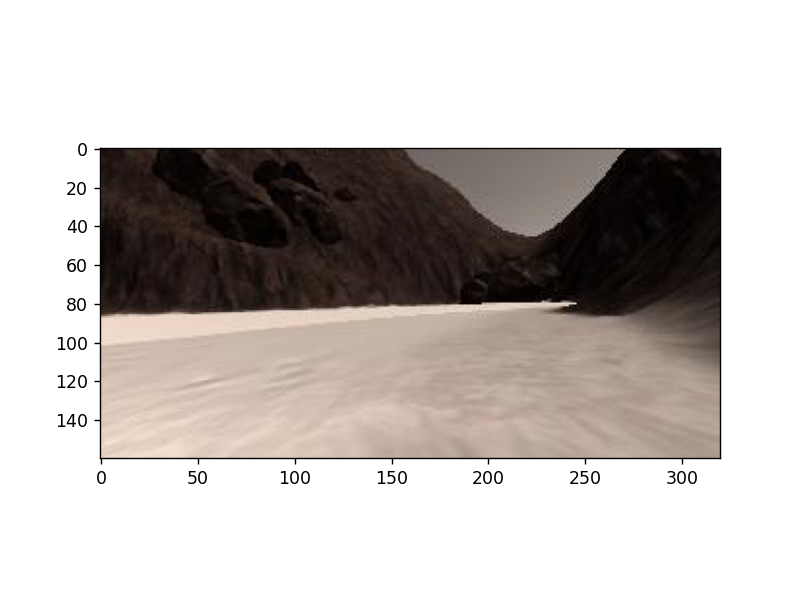

uint8 (160, 320, 3) 0 251
320


In [2]:
path = './test_dataset/IMG/*'
img_list = glob.glob(path)
#print(img_list)
#Επιλογή μιάς τυχαίας εικόνας
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
plt.imshow(image)
print(image.dtype, image.shape, np.min(image), np.max(image))
print(image.shape[1])

## Μια πιο αναλυτική ματιά στα δεδομένα

Ο υπολογιστής αντιλαμβάνεται τις εικόνες ως τρισδιάστατους πίνακες δεδομένων. Η μία διάσταση είναι το μήκος, η άλλη είναι το ύψος (ΠΡΟΣΟΧΗ: ο άξονας των y είναι ανεστραμμένος) και η τρίτη είναι τα χρωματικά κανάλια. Συνήθως τα χρωματικά κανάλια που χρησιμοποιούνται είναι 3, τα R,G,B. Δηλαδή στις παραπάνω εικόνες που είδαμε το x είναι 160, το y είναι 320 και τα χρωματικά κανάλια (z) είναι 3. Κάθε (x,y) αυτού του τρισδιάστατου πίνακα αντιπροσωπεύει ένα pixel οθόνης. Έπειτα ρυθμίζοντας τα χρωματικά κανάλια, δίνουμε το επιθυμητό χρώμα στα pixels.

<IPython.core.display.Javascript object>


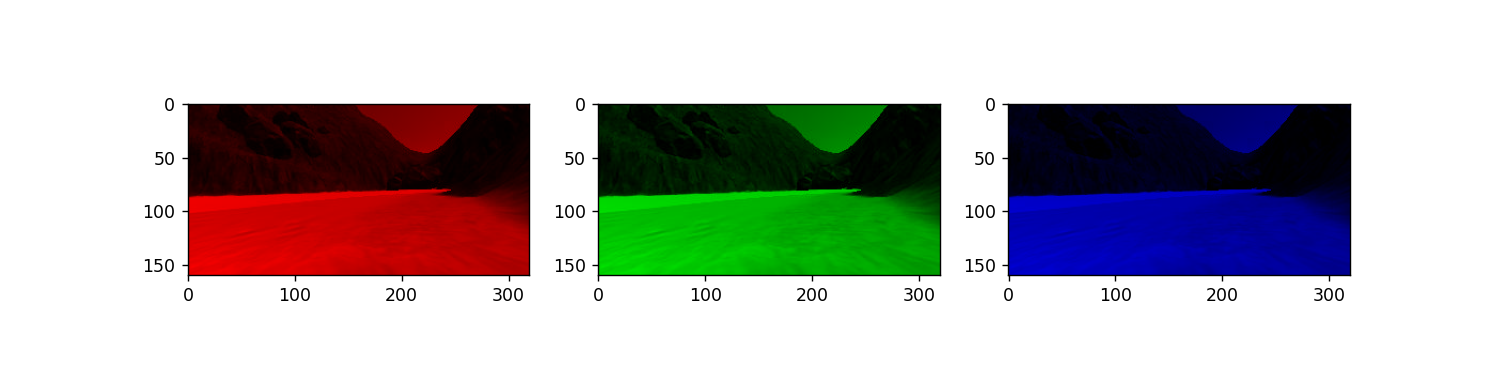

In [3]:

red_channel = np.copy(image)
red_channel[:,:,[1, 2]] = 0 # Μηδενίζουμε τα κανάλια G και B 

green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Μηδενίζουμε τα κανάλια R και B

blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Μηδενίζουμε τα κανάλια G και R

fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(red_channel) 
plt.subplot(132) 
plt.imshow(green_channel)  
plt.subplot(133)
plt.imshow(blue_channel) 
plt.show() 

## Βαθμονόμηση (Calibration) των δεδομένων

Διαβάστε και εμφανίστε παραδείγματα βαθμονόμησης δειγμάτων πλέγματος και πετρωμάτων. Θα χρησιμοποιήσετε το πλέγμα για μετασχηματισμό προοπτικής και την εικόνα με το πέτρωμα για τη δημιουργία μιας νέας επιλογής χρωμάτος που προσδιορίζει αυτά τα δείγματα ενδιαφέροντος. 

<IPython.core.display.Javascript object>


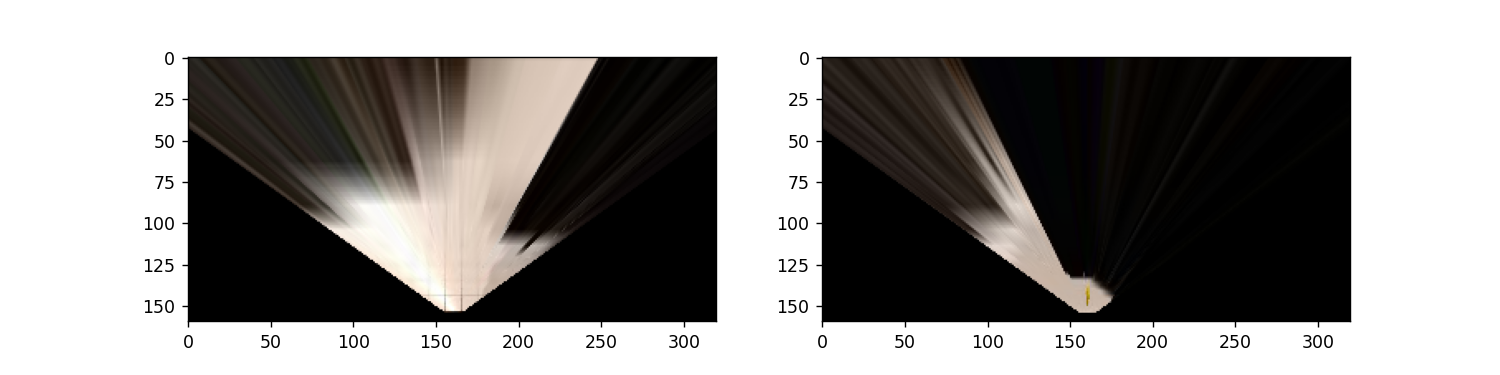

In [4]:
# Στον προσομοιωτή μπορείτε να κάνετε εναλλαγή σε πλέγμα στο έδαφος για βαθμονόμηση
# Μπορείτε επίσης να κάνετε εναλλαγή στα δείγματα πετρωμάτων με το πλήκτρο 0 (μηδέν).
# Εδώ είναι ένα παράδειγμα του πλέγματος και ενός από τα πετρώματα

example_grid = './calibration_images/example_grid1.jpg'
example_rock = './calibration_images/example_rock1.jpg'
grid_img = mpimg.imread(example_grid)
rock_img = mpimg.imread(example_rock)
hsv = cv2.cvtColor(rock_img, cv2.COLOR_BGR2HSV)
fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(grid_img)
plt.subplot(122)
plt.imshow(hsv)
#plt.imshow(rock_img)

## Μετασχηματισμός Προοπτικής (ΣΥΜΠΛΗΡΩΝΕΤΕ ΚΩΔΙΚΑ)

Ορίστε τη συνάρτηση μετασχηματισμού προοπτικής και δοκιμάστε την σε μια εικόνα.

In [17]:
# Ορίστε μια συνάρτηση για να πραγματοποιήσετε μετασχηματισμό προοπτικής
# Έχω χρησιμοποιήσει το παραπάνω παράδειγμα πλέγματος για να επιλέξω σημεία πηγής για το
# κελί πλέγματος μπροστά από το rover (κάθε κελί πλέγματος είναι 1 τετραγωνικό μέτρο στο sim)
# Ορίστε μια συνάρτηση για να πραγματοποιήσετε ένα μετασχηματισμό προοπτικής
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# διατηρήστε το ίδιο μέγεθος με την εικόνα εισαγωγής
    
    return warped


# Ορίστε το πλαίσιο βαθμονόμησης στις συντεταγμένες προέλευσης και προορισμού
# Αυτά τα σημεία προέλευσης και προορισμού ορίζονται για να παραμορφώσουν την εικόνα
# σε ένα πλέγμα όπου κάθε τετράγωνο 10x10 pixel αντιπροσωπεύει 1 τετραγωνικό μέτρο
# Το πλαίσιο προορισμού θα έχει μέγεθος 2 * dst_ σε κάθε πλευρά
dst_size = 5 
# Ορίστε ένα bottom_offset για να λάβετε υπόψη το γεγονός ότι το κάτω μέρος της εικόνας
# δεν είναι η θέση του rover αλλά λίγο μπροστά του
bottom_offset = 6

###############################################################################
#########################ΣΥΜΠΛΗΡΩΣΤΕ ΕΔΩ#######################################

#συμπληρώστε εδώ

source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
#155,154, 165,154, 165,144  ,155, 144
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])



###############################################################################
###############################################################################


warped = perspect_transform(grid_img, source, destination)
warped_rock = perspect_transform(rock_img, source, destination) 
plt.subplot(121)
plt.imshow(warped)
plt.subplot(122)
plt.imshow(warped_rock)
plt.show() 

D:\miniconda3\envs\Robotics1\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


## Κατώφλι Χρώματος

**TODO:** Τελικά, θέλετε ο χάρτης σας να μην περιλαμβάνει απλώς πλοήγηση εδάφους, αλλά και εμπόδια και τις θέσεις των πετρωμάτων που αναζητάτε. Τροποποιήστε αυτήν τη συνάρτηση ή γράψτε μια νέα συνάρτηση που επιστρέφει τα σημεία των εμποδίων των εικονοστοιχείων (περιοχές κάτω από το όριο) και δείγματα βράχου (κίτρινοι βράχοι σε εικόνες βαθμονόμησης), έτσι ώστε να μπορείτε να χαρτογραφήσετε αυτές τις περιοχές και σε παγκόσμιες συντεταγμένες.

**Hints:** 
* Για εμπόδια μπορείτε απλώς να αντιστρέψετε την επιλογή χρωμάτων που χρησιμοποιήσατε για την ανίχνευση εικονοστοιχείων εδάφους, δηλαδή, εάν έχετε αποφασίσει ότι όλα πάνω από το κατώφλι είναι πλοήγηση εδάφους, τότε οτιδήποτε κάτω από το κατώφλι πρέπει να είναι εμπόδιο!


* Για τα πετρώματα, σκεφτείτε να επιβάλλετε ένα κατώτερο και ανώτερο όριο στην επιλογή χρωμάτων για να είστε πιο συγκεκριμένοι σχετικά με την επιλογή χρωμάτων. Μπορείτε να διερευνήσετε τα χρώματα των πετρωμάτων (τιμές pixel RGB) σε ένα διαδραστικό παράθυρο matplotlib για να αποκτήσετε μια αίσθηση για το κατάλληλο εύρος κατωφλίου (λάβετε υπόψη ότι μπορεί να θέλετε διαφορετικά εύρη για καθένα από τα R, G και B!). Μη διστάσετε να γίνετε δημιουργικοί!!


<IPython.core.display.Javascript object>


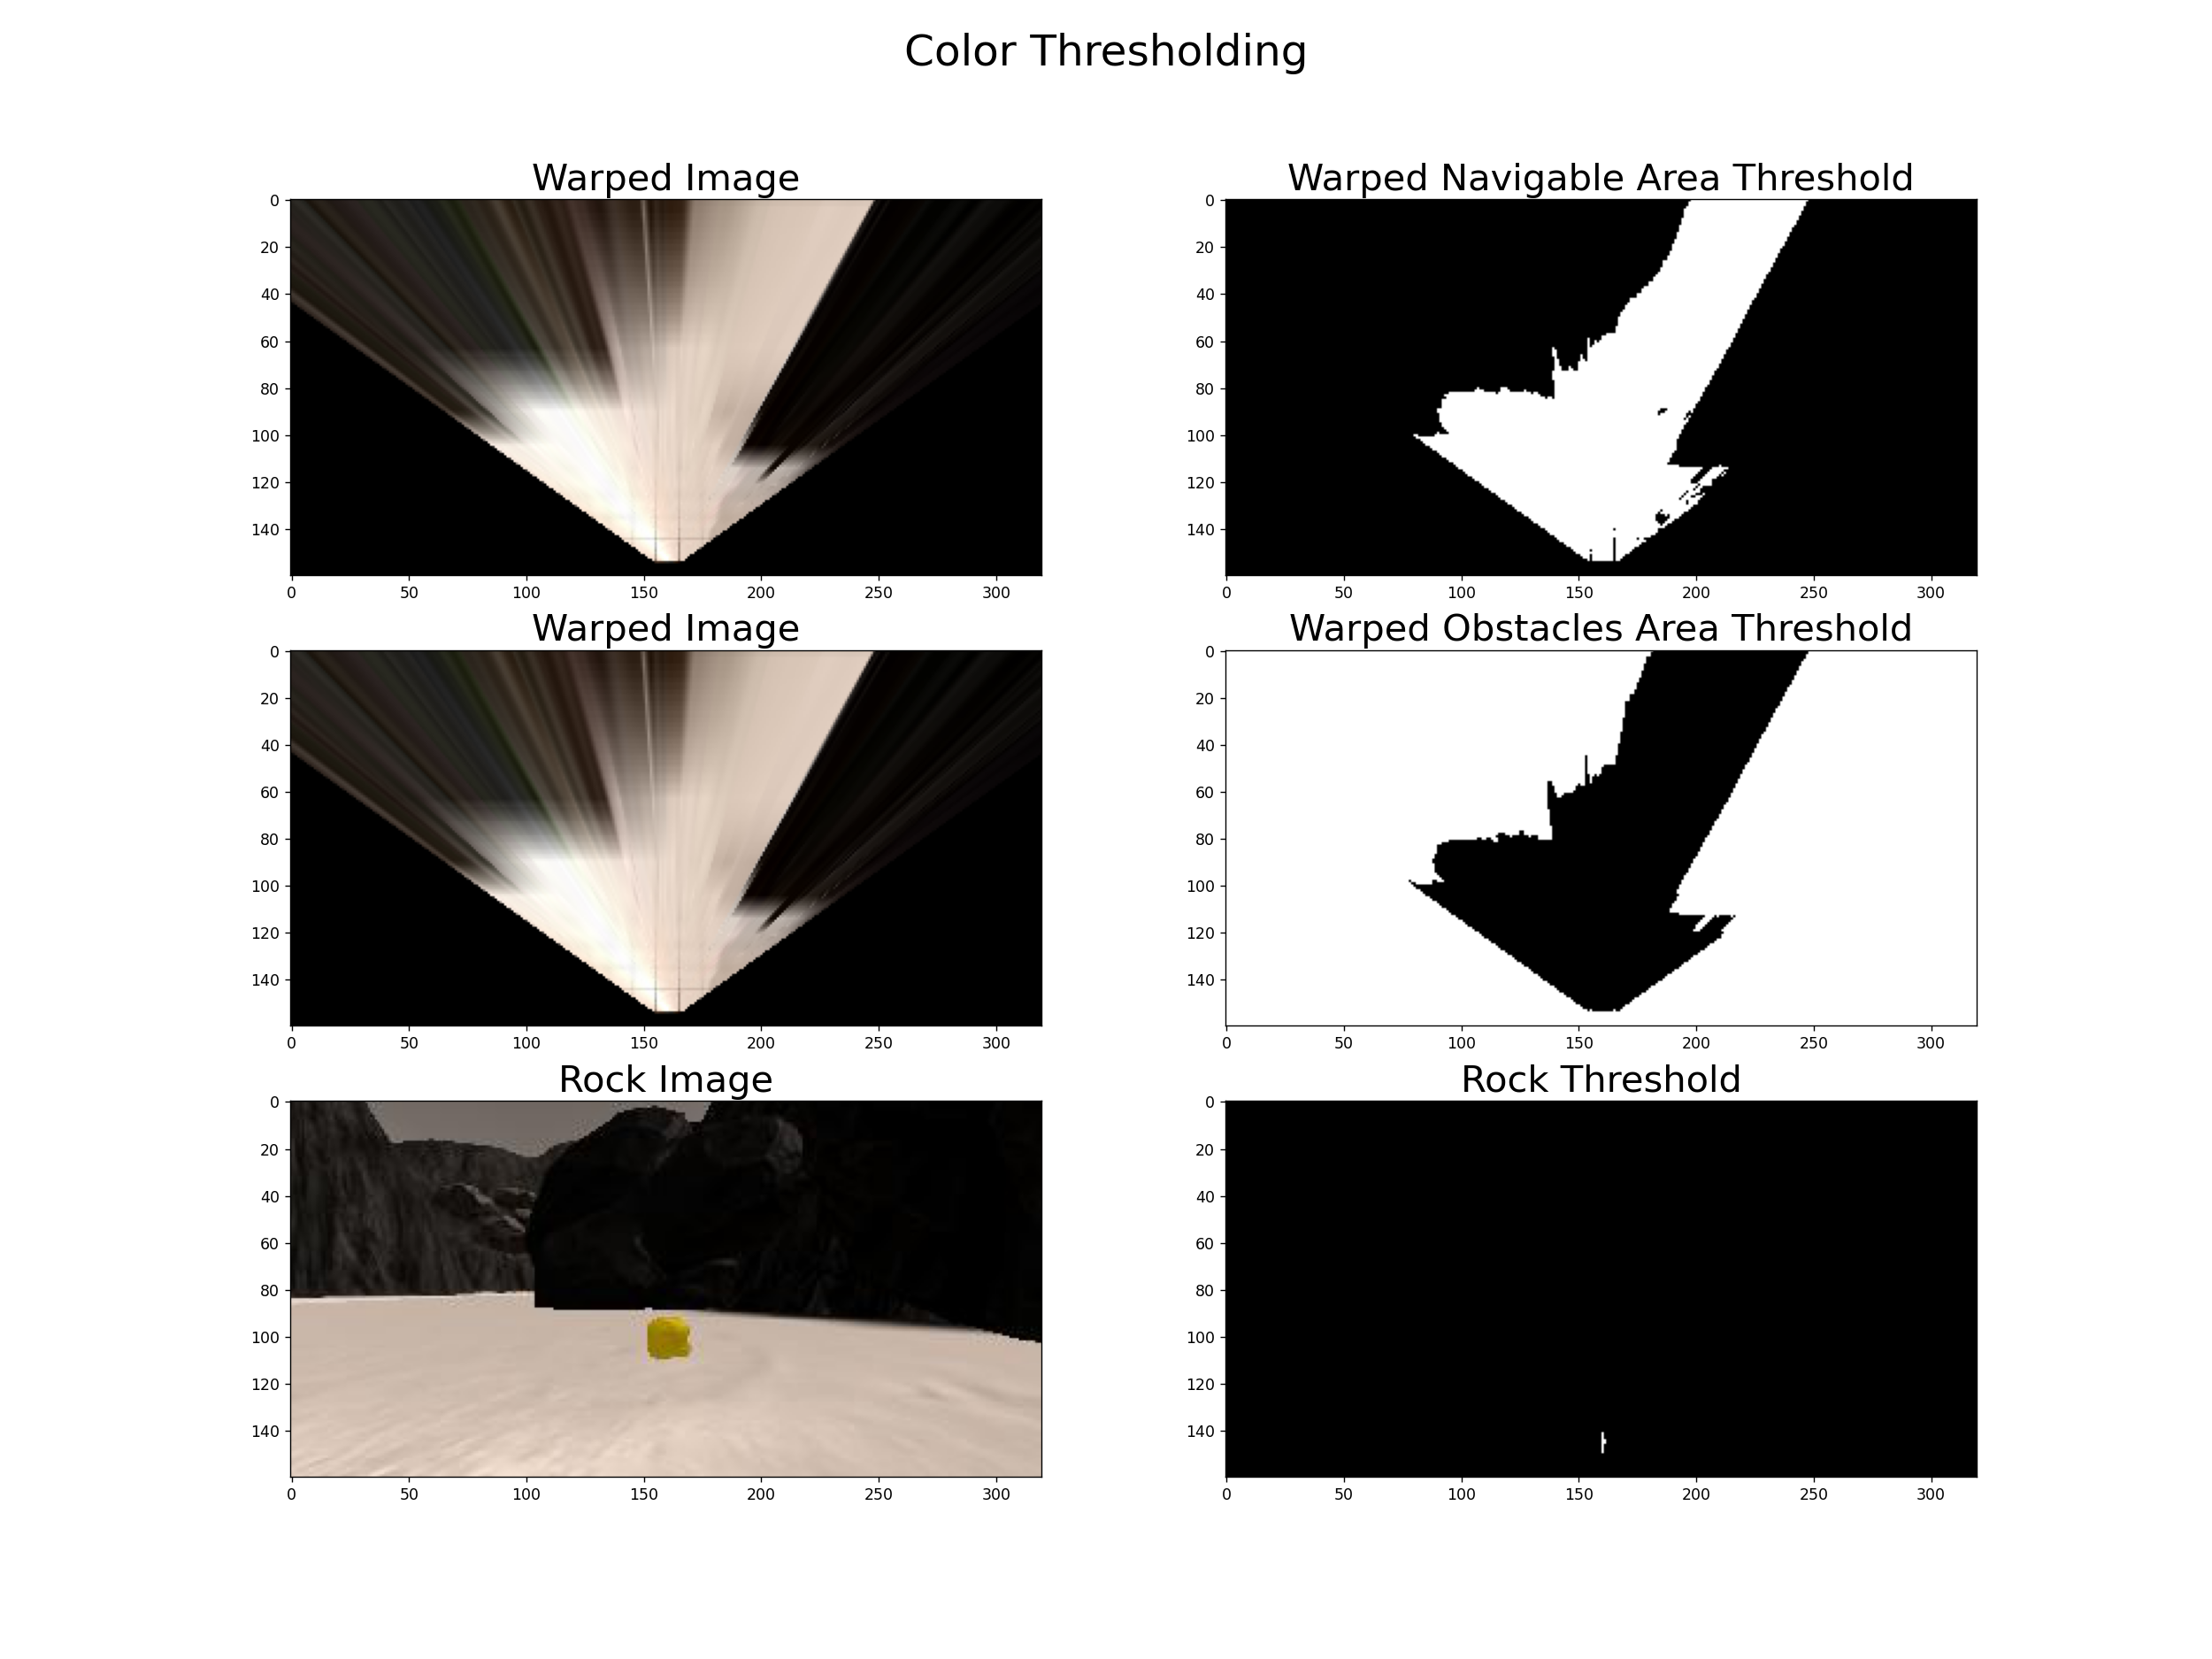

In [6]:
# Βρείτε τα pixel που είναι πάνω από το κατώφλι
# Το κατώφλι για RGB > 160 είναι μια καλή εκτίμηση για να βρούμε τα pixels που θέλουμε, δηλαδή "φωτεινό" λευκό
def ground_thresh(img, rgb_thresh=(160, 160, 160)):
    
    ###############################################################################
    #########################ΣΥΜΠΛΗΡΩΣΤΕ ΕΔΩ#######################################
    
    # Δημιουργία ενός πίνακα με μηδενικά για να αποθηκεύσουμε την εικόνα που θα προκύψει, αλλά με ένα μόνο channel
    # αφού θα έχουμε τιμές 0 ή 1 (ασπρόμαυρο)
    ground_select = np.zeros_like(img[:,:,0])
    # Απαιτείται κάθε εικονοστοιχείο να είναι πάνω από τις τρεις τιμές κατωφλίου σε RGB
    # Το above_thresh θα περιέχει τώρα έναν δυαδικό πίνακα με "True"
    # όπου ικανοποιήθηκε το όριο
    
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1]  > rgb_thresh[1]) \
                & (img[:,:,2]  > rgb_thresh[2])
    #print(above_thresh)
    ground_select[above_thresh] = 1
    #print(ground_select[above_thresh])
    
    ###############################################################################
    ###############################################################################
    
    return ground_select

def rock_thresh(img) :
    
    
    hsv_img=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    rock_lower = np.array([0,200,100])     # HSV lower limit for golden rocks
    rock_upper = np.array([179,255,255])   # HSV upper limit for golden rocks
    
    rock_select = cv2.inRange(hsv_img, rock_lower, rock_upper)
      
    return rock_select*255
    
    
    

def obstacle_thresh(img, rgb_thresh=(160, 160, 160)):
    
    ###############################################################################
    #########################ΣΥΜΠΛΗΡΩΣΤΕ ΕΔΩ#######################################
    
    obstacle_select = np.zeros_like(img[:,:,0])
    above_thresh = (img[:,:,0] < rgb_thresh[0]) \
                & (img[:,:,1]  < rgb_thresh[1]) \
                & (img[:,:,2]  < rgb_thresh[2])
    
    obstacle_select[above_thresh] = 1
    
    ###############################################################################
    ###############################################################################
    
    return obstacle_select

#threshed = ground_thresh(warped)
#plt.imshow(threshed, cmap='gray')
# test thresholding functions on sample images
ground_select,obstacle_select = ground_thresh(warped),obstacle_thresh(warped)  # Threshold warped image to show both navigable and obstacles areas
rock_select       = rock_thresh(warped_rock)           # Threshold calibration image to isolate the rock

# Display the three threshold images

f, ax = plt.subplots(3, 2, figsize=(20,15))
f.suptitle('Color Thresholding', fontsize=28)

ax[0,0].imshow(warped)
ax[0,0].set_title('Warped Image', fontsize=24)

ax[0,1].imshow(ground_select,cmap='gray')
ax[0,1].set_title('Warped Navigable Area Threshold', fontsize=24)

ax[1,0].imshow(warped)
ax[1,0].set_title('Warped Image', fontsize=24)

ax[1,1].imshow(obstacle_select,cmap='gray')
ax[1,1].set_title('Warped Obstacles Area Threshold', fontsize=24)

ax[2,0].imshow(rock_img)
ax[2,0].set_title('Rock Image', fontsize=24)

ax[2,1].imshow(rock_select,cmap='gray')
ax[2,1].set_title('Rock Threshold', fontsize=24)

plt.show()


## Μετασχηματισμός Συντεταγμένων (ΣΥΜΠΛΗΡΩΝΕΤΕ ΚΩΔΙΚΑ)

Καθορίστε τις συναρτήσεις που χρησιμοποιούνται για να πραγματοποιήσετε μετασχηματισμούς συντεταγμένων και να τις εφαρμόσετε σε μια εικόνα.

<IPython.core.display.Javascript object>


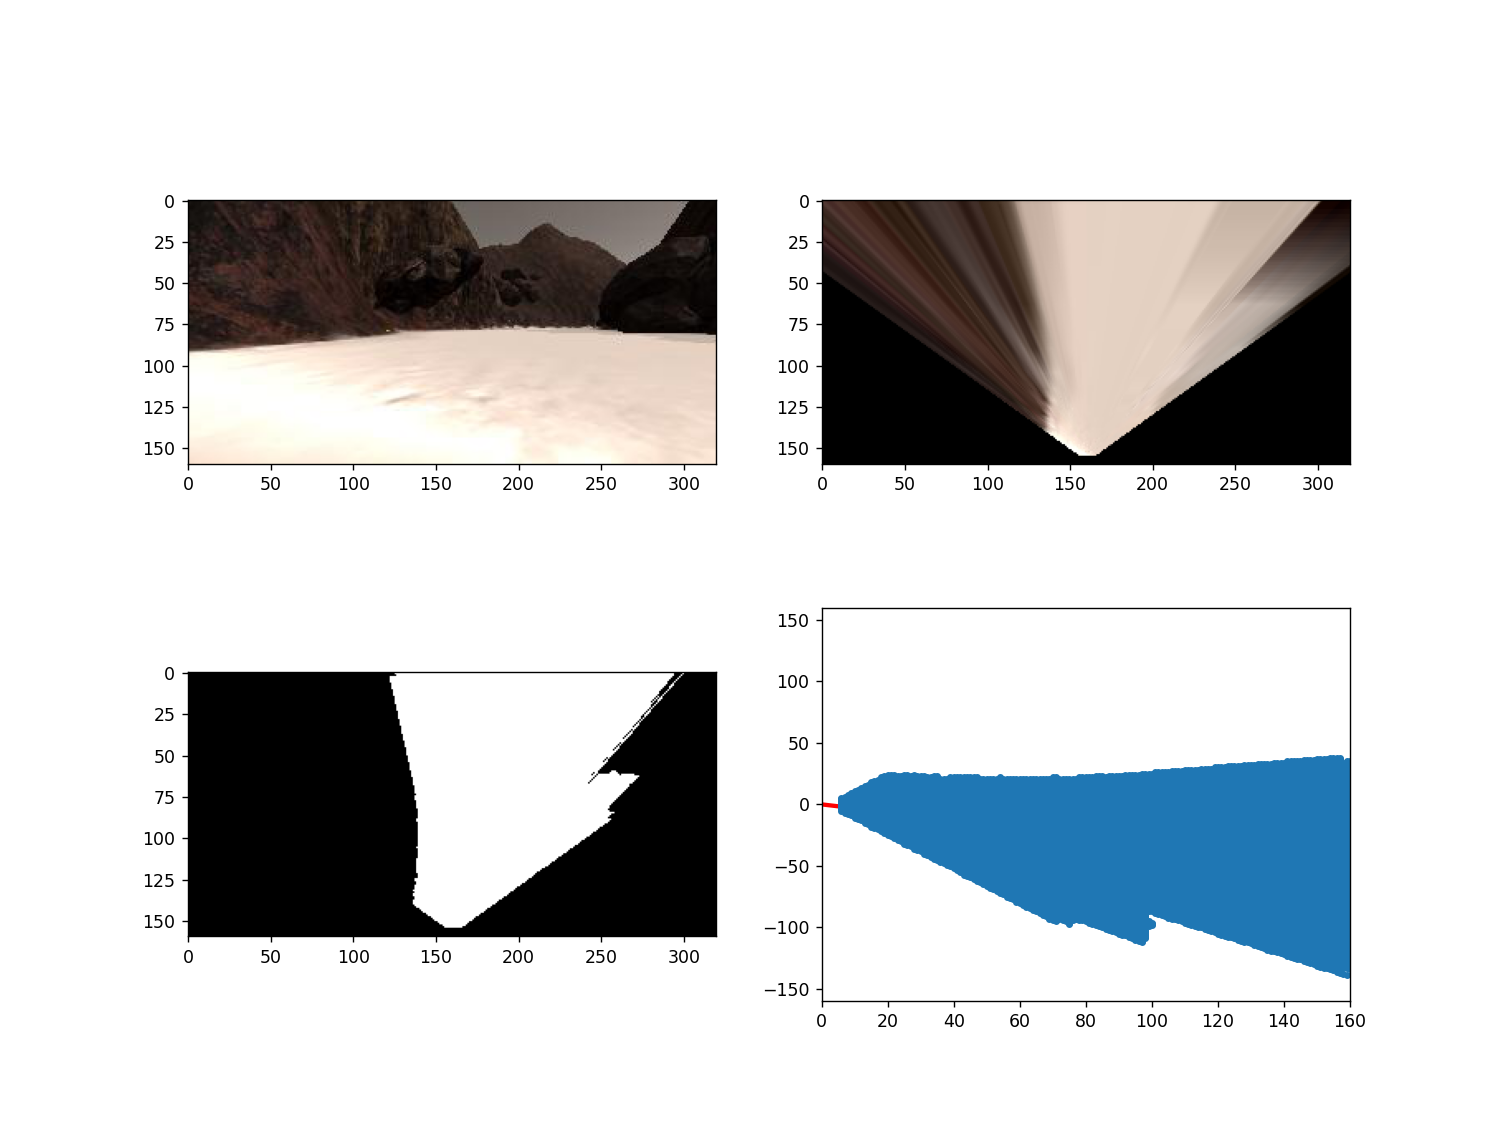

In [23]:
# Μετατροπή από τις συντεταγμένες της εικόνας σε συντεταγμένες rover
def rover_coords(binary_img):
    # Βρείτε τα μη μηδενικά pixels
    ypos, xpos = binary_img.nonzero()
    # Υπολογίστε τις θέσεις pixel με τη θέση του rover να βρίσκεται στο
    # κεντρικό κάτω μέρος της εικόνας.

    x_pixel =  -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel =  -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    
    return x_pixel, y_pixel

# Μετατροπή σε πολικές συντεταγμένες
def to_polar_coords(x_pixel, y_pixel):
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
   
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

# Εφαρμογή περιστροφής
def rotate_pix(xpix, ypix, yaw):
    
    ###############################################################################
    #########################ΣΥΜΠΛΗΡΩΣΤΕ ΕΔΩ#######################################
    # Μετατροπή μοιρών σε ακτίνια
    yaw_rad = (yaw * np.pi) / 180
    
    # Εφαρμόστε περιστροφή
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad)) 
    
    ###############################################################################
    ###############################################################################
      
    return xpix_rotated, ypix_rotated

#Εφαρμογή μετaτόπισης και κλιμάκωσης
def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    
    ###############################################################################
    #########################ΣΥΜΠΛΗΡΩΣΤΕ ΕΔΩ#######################################
    
    # Εφαρμόστε κλιμάκωση και μετατόπιση
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    
    ###############################################################################
    ###############################################################################
    
    return xpix_translated, ypix_translated


# Ορίστε μια συνάρτηση για εφαρμογή περιστροφής και μετάτόπισης (και αποκοπής).
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Περιστροφή
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Μετατόπιση
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Αποκοπή των pixels που πέφτουν έξω από τον κόσμο
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    
    # επιστροφή των συντεταγμένων κόσμου
    return x_pix_world, y_pix_world

# Επιλογή τυχαίας εικόνας
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
warped = perspect_transform(image, source, destination)
threshed = ground_thresh(warped)

# Υπολογισμός όλων των pixels σε ρομπο-κεντρικές συντεταγμένες και υπολογισμός απόστασης/γωνίας όλων τον pixels
xpix, ypix = rover_coords(threshed)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)
#print(xpix,ypix,dist,angles)


fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(threshed, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(mean_dir)
y_arrow = arrow_length * np.sin(mean_dir)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)



## Διαβάστε τα αποθηκευμένα δεδομένα και έναν ground-truth χάρτη

Στο επόμενο κελί θα διαβάσετε τα αποθηκευμένα δεδομένα σας σε ένα πλαίσιο δεδομένων «pandas». Εδώ θα διαβάσετε επίσης έναν χάρτη "ground truth" του κόσμου, όπου τα λευκά εικονοστοιχεία (τιμή pixel = 1) αντιπροσωπεύουν το πλοηγήσιμο εδάφους.

Μετά από αυτό, θα ορίσουμε μια κλάση για την αποθήκευση δεδομένων τηλεμετρίας και τα paths των εικόνων. Όταν δημιουργείτε αυτήν την κλάση ("data = Databucket ()") θα έχετε μια καθολική μεταβλητή που ονομάζεται "data" στην οποία μπορείτε να ανατρέξετε για τηλεμετρία και δεδομένα χαρτών στη συνάρτηση "process_image ()" στο παρακάτω κελί.


In [24]:
import pandas as pd
# Αλλάξτε τις παρακάτω διαδρομές αν είναι απαραίτητο για τα δικά σας δεδομένα
df = pd.read_csv('./test_dataset/robot_log.csv', delimiter=';', decimal='.')
csv_img_list = df["Path"].tolist() # Δημιουργία λίστας με τα ονόματα και τις διαδρομές των εικόνων

# Διαβάζουμε τον χάρτη και τον μετατρέπουμε σε εικόνα με 3 κανάλια
ground_truth = mpimg.imread('./calibration_images/map_bw.png')
ground_truth_3d = np.dstack((ground_truth*0, ground_truth*255, ground_truth*0)).astype(np.float)


# Δημιουργία κλάσης για να κρατάμε τα δεδομένα
# Θα διαβάσει αποθηκευμένα δεδομένα από το αρχείο csv και θα συμπληρώσει αυτό το αντικείμενο
# Ο Χάρτης αντιστοιχεί σε ένα πλέγμα 200 x 200
# σε χώρο 200m x 200m (ίδιο μέγεθος με το χάρτη αλήθειας εδάφους: 200 x 200 pixel)
# Αυτό περιλαμβάνει το πλήρες εύρος τιμών θέσης εξόδου σε x και y από το sim
class Databucket():
    def __init__(self):
        self.images = csv_img_list  
        self.xpos = df["X_Position"].values
        self.ypos = df["Y_Position"].values
        self.yaw = df["Yaw"].values
        self.count = 0 
        self.worldmap = np.zeros((200, 200, 3)).astype(np.float)
        self.ground_truth = ground_truth_3d # Ground truth worldmap

# Ορίστε ένα Databucket().. θα είναι global μεταβλητή
# όπου θα μπορούμε να την προσπελάσουμε από παντού
data = Databucket()


## Γράψτε μια συνάρτηση για την επεξεργασία αποθηκευμένων εικόνων (ΣΥΜΠΛΗΡΩΝΕΤΕ ΚΩΔΙΚΑ)

Τροποποιήστε τη συνάρτηση process_image () παρακάτω προσθέτοντας τις διαδικασίες βημάτων αντίληψης (συναρτήσεις που ορίζονται παραπάνω) για να εκτελέσετε ανάλυση εικόνας και χαρτογράφηση. Το ακόλουθο κελί έχει ρυθμιστεί ώστε να χρησιμοποιεί αυτήν τη συνάρτηση process_image () σε συνδυασμό με το πακέτο επεξεργασίας βίντεο moviepy για τη δημιουργία βίντεο από τις εικόνες που αποθηκεύσατε λαμβάνοντας δεδομένα στον προσομοιωτή.  

Με λίγα λόγια, θα μεταφέρετε μεμονωμένες εικόνες στο "process_image ()" και θα δημιουργήσετε μια εικόνα που ονομάζεται "output_image", η οποία θα αποθηκευτεί ως ένα video frame. Μπορείτε να δημιουργήσετε ένα μωσαϊκό από τα διάφορα βήματα της διαδικασίας ανάλυσής σας και να προσθέσετε κείμενο όπως θέλετε (παράδειγμα παρέχεται παρακάτω).

Αρχικά, μπορείτε απλά να εκτελέσετε τα επόμενα κελιά για να δείτε τι συμβαίνει, αλλά στη συνέχεια προχωρήστε και τροποποιήστε τα έτσι ώστε το βίντεο εξόδου να δείχνει τη διαδικασία χαρτογράφησης.

In [25]:
# Ορίστε μια συνάρτηση για να φορτώσετε αποθηκευμένες εικόνες
# από το databucket παίρνετε το x,y και το yaw
# Αυτή η συνάρτηση θα χρησιμοποιηθεί από το moviepy για τη δημιουργία βίντεο εξόδου
def process_image(img):
    # παράδειγμα χρήσης του databucket
    # print(data.xpos[data.count], data.ypos[data.count], data.yaw[data.count])         
    # TODO: 
    # 1) Ορίστε σημεία προέλευσης και προορισμού για μετασχηματισμό προοπτικής
    dst_size = 5 
    bottom_offset = 6
    scale    = 10             # each 10x10 pixel square represents 1 square meter
    
    rvr_xpos = data.xpos[data.count]
    rvr_ypos = data.ypos[data.count]
    rvr_yaw  = data.yaw[data.count]
    wrl_shp0 = data.worldmap.shape[0]

    source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
    #155,154, 165,154, 165,144  ,155, 144
    destination = np.float32([[img.shape[1]/2 - dst_size, img.shape[0] - bottom_offset],
                  [img.shape[1]/2 + dst_size, img.shape[0] - bottom_offset],
                  [img.shape[1]/2 + dst_size, img.shape[0] - 2*dst_size - bottom_offset], 
                  [img.shape[1]/2 - dst_size, img.shape[0] - 2*dst_size - bottom_offset],
                  ])
    
    # 2) Εφαρμόστε κατώφλι χρώματος για να αναγνωρίσετε προσπελάσιμο έδαφος, εμπόδια και πετρώματα 
    ground = ground_thresh(img)
    obstacle = obstacle_thresh(img)
    rock = rock_thresh(img)

    # 3) Εφαρμόστε μετασχηματισμό προοπτικής
    warped_ground = perspect_transform(ground, source, destination)
    warped_obstacle = perspect_transform(obstacle, source, destination)
    warped_rock = perspect_transform(rock, source, destination)

    # 4) Μετατρέψτε τις συντεταγμένες των pixels στην εικόνα σε ρομποκεντρικές
    grdx_pix, grdy_pix = rover_coords(warped_ground)  # convert navigable area thresholded to rover coords.
    obstx_pix, obsty_pix = rover_coords(warped_obstacle)  # convert obstacle area thresholded to rover coords.
    rockx_pix, rocky_pix = rover_coords(warped_rock)  # convert rock thresholded to rover coords.
     
    # 5) Μετατρέψτε τις ρομποκεντρικές συντεταγμένες σε συντεταγμένες περιβάλλοντος
    grdx_wld, grdy_wld = pix_to_world(grdx_pix, grdy_pix, rvr_xpos, rvr_ypos, rvr_yaw, wrl_shp0,scale)
    obstx_wld, obsty_wld = pix_to_world(obstx_pix, obsty_pix, rvr_xpos, rvr_ypos, rvr_yaw, wrl_shp0,scale)                                                     
    rockx_wld, rocky_wld = pix_to_world(rockx_pix, rocky_pix, rvr_xpos, rvr_ypos, rvr_yaw, wrl_shp0,scale)
    
    # 6) Ενημερώστε τον χάρτη του κόσμου 
    data.worldmap[obsty_wld, obstx_wld, 0] += 1
    data.worldmap[rocky_wld, rockx_wld, 1] += 1
    data.worldmap[grdy_wld, grdx_wld, 2] += 1
    
    ###############################################################################
    ###############################################################################
    
    # 7) Δημιουργήστε ένα βίντεο mosaic με τα βήματα που ακολουθήσατε
        # Για αρχη δημιουργήστε ένα κενό image
    output_image = np.zeros((img.shape[0] + data.worldmap.shape[0], img.shape[1]*2, 3))
        # Έπειτα τοποθετήστε σε κάθε περιοχή του αυτά που θέλετε
        
        # Πάνω αριστερά την εικόνα 
    output_image[0:img.shape[0], 0:img.shape[1]] = img

        # Πάνω δεξία τη μετασχηματισμένη εικόνα
    output_image[0:img.shape[0], img.shape[1]:] = warped

        # Επίστρωνουμε τον χάρτη που έχουμε με τον χάρτη που περιέχει το ground truth
    map_add = cv2.addWeighted(data.worldmap, 1, data.ground_truth, 0.5, 0)
    output_image[img.shape[0]:, 0:data.worldmap.shape[1]] = np.flipud(map_add)


        # Then putting some text over the image
    cv2.putText(output_image,"Populate this image with your analyses to make a video!", (20, 20), 
                cv2.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)
    if data.count < len(data.images) - 1:
            data.count += 1
    
    return output_image

## Δημιουργήστε ένα βίντεο με τα επεξεργασμένα δεδομένα
  

In [26]:
from moviepy.editor import VideoFileClip
from moviepy.editor import ImageSequenceClip


# Ορίστε ένα όνομα και ένα μονοπάτι αρχείου
output = './output/test_mapping.mp4'
data = Databucket()
clip = ImageSequenceClip(data.images, fps=20)
new_clip = clip.fl_image(process_image) 
%time new_clip.write_videofile(output, audio=False)

Moviepy - Building video ./output/test_mapping.mp4.
Moviepy - Writing video ./output/test_mapping.mp4



Moviepy - Done !
Moviepy - video ready ./output/test_mapping.mp4
Wall time: 4.07 s


### Δείτε το βίντεο που δημιουργήσατε

In [27]:
from IPython.display import HTML
import io
import base64
video = io.open(output, 'r+b').read()
encoded_video = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded_video.decode('ascii')))